In [1]:
import numpy as np
from utils.noise import make_noise
from utils.recollection import recollection
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#画像の読み込み
Q_1 = np.loadtxt("picture/picture_1.csv", delimiter = ",", dtype = int)
Q_2 = np.loadtxt("picture/picture_2.csv", delimiter = ",", dtype = int)

In [3]:
q_1 = np.array([Q_1.flatten()])
q_2 = np.array([Q_2.flatten()])

In [4]:
q_1

array([[-1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,
         1,  1,  1, -1, -1,  1, -1,  1, -1]])

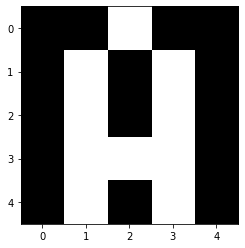

In [5]:
fig, ax = plt.subplots()
ax.imshow(Q_1, cmap="gray")

In [6]:
#重み行列の作成
W = np.dot(q_1.T,q_1) + np.dot(q_2.T,q_2)

In [7]:
#Wの対角成分をゼロに
W_diag = np.diag(W)
W_diag.flags.writeable = True
np.putmask(W_diag, W_diag > 0, 0)

In [8]:
noise = 20
thete = 0

In [9]:
#元画像にノイズを加える
q_1_noise = make_noise(q_1, noise)

In [10]:
Q_1_noise = q_1_noise.reshape(5,5)

In [11]:
q_1_noise

array([[ 1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,
         1,  1, -1, -1, -1, -1, -1,  1, -1]])

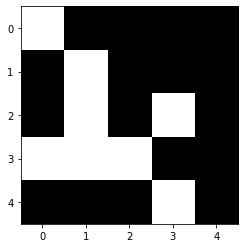

In [12]:
fig, ax = plt.subplots()
ax.imshow(Q_1_noise, cmap="gray")

In [13]:
similar, q_1_rec = recollection(q_1[0], q_1_noise[0], W, thete, 100)

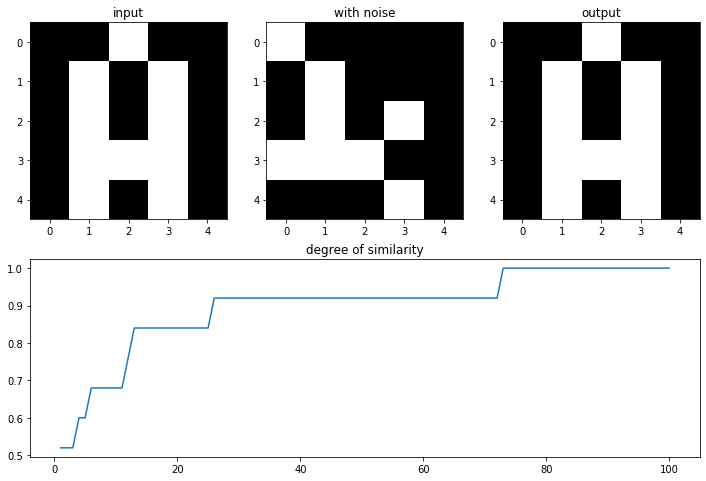

In [14]:
Q_1_rec = q_1_rec.reshape(5,5)
x = np.linspace(1,100,100)
fig = plt.figure(figsize = (12,8))
gs = gridspec.GridSpec(2,3)

ax1 = fig.add_subplot(gs[0,0])
ax1.set_title('input')
ax1.imshow(Q_1, cmap="gray")
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title('with noise')
ax2.imshow(Q_1_noise, cmap="gray")
ax3 = fig.add_subplot(gs[0,2])
ax3.set_title('output')
ax3.imshow(Q_1_rec, cmap="gray")
ax4 = fig.add_subplot(gs[1,:])
ax4.set_title('degree of similarity')
ax4.plot(x, similar)

In [14]:
similar

array([0.28, 0.28, 0.2 , 0.2 , 0.2 , 0.2 , 0.28, 0.28, 0.28, 0.28, 0.28,
       0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.36, 0.36, 0.36, 0.36, 0.36,
       0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36,
       0.36, 0.36, 0.36, 0.36, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52,
       0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52,
       0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.6 , 0.6 , 0.6 ,
       0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ,
       0.6 ])

In [12]:
for n in range(100):
    similar = np.dot(q_1_noise[0], q_1[0]) / 25
    print(similar)
    i = np.random.randint(25)
    if np.dot(W[i], q_1_noise[0]) - thete >= 0:
        q_1_noise[0][i] = 1
    else:
        q_1_noise[0][i] = -1

0.6
0.6
0.6
0.6
0.68
0.68
0.68
0.68
0.68
0.68
0.68
0.68
0.68
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.92
0.92
0.92
0.92
0.92
0.92
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


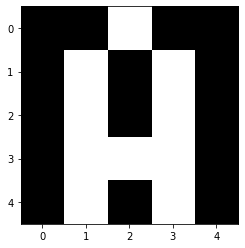

In [13]:
Q_1_rec = q_1_noise.reshape(5,5)
fig, ax = plt.subplots()
ax.imshow(Q_1_rec, cmap="gray")

array([[ 1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
         1, -1, -1, -1,  1, -1,  1, -1,  1]])

In [17]:
q_1_noise = q_1

In [14]:
q_2_noise = make_noise(q_2, noise)

In [15]:
q_2_noise

array([[-1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
        -1, -1, -1, -1,  1,  1, -1, -1, -1]])

In [16]:
for n in range(100):
    i = np.random.randint(25)
    if np.dot(W[i], q_2_noise[0]) - thete >= 0:
        q_2_noise[0][i] = 1
    else:
        q_2_noise[0][i] = -1

In [17]:
q_2

array([[ 1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
        -1, -1, -1, -1,  1,  1,  1,  1, -1]])

In [18]:
q_2_noise

array([[ 1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
        -1, -1, -1, -1,  1,  1,  1,  1, -1]])